# Doge Price Pradiction test
*Install dependencies*

In [10]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

Description: This app will take Dogecoin prices and predict next 25 day prices using Machine Learning

*Data pre processing*

In [11]:
uploaded =pd.read_csv('DOGE-USD.csv')

In [12]:
#Store the data into data frame
df = pd.read_csv('DOGE-USD.csv')
df.head(5)
df.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
2469,2021-06-21,0.280660,0.280889,0.166491,0.178691,0.178691,5.640232e+09
2470,2021-06-22,0.178682,0.216122,0.164654,0.191031,0.191031,5.992850e+09
2471,2021-06-23,0.190671,0.247110,0.180979,0.232174,0.232174,5.098675e+09
2472,2021-06-24,0.234970,0.268690,0.222527,0.262782,0.262782,3.844648e+09
2473,2021-06-25,0.266140,0.287627,0.247841,0.255402,0.255402,5.220551e+09


<function matplotlib.pyplot.show(close=None, block=None)>

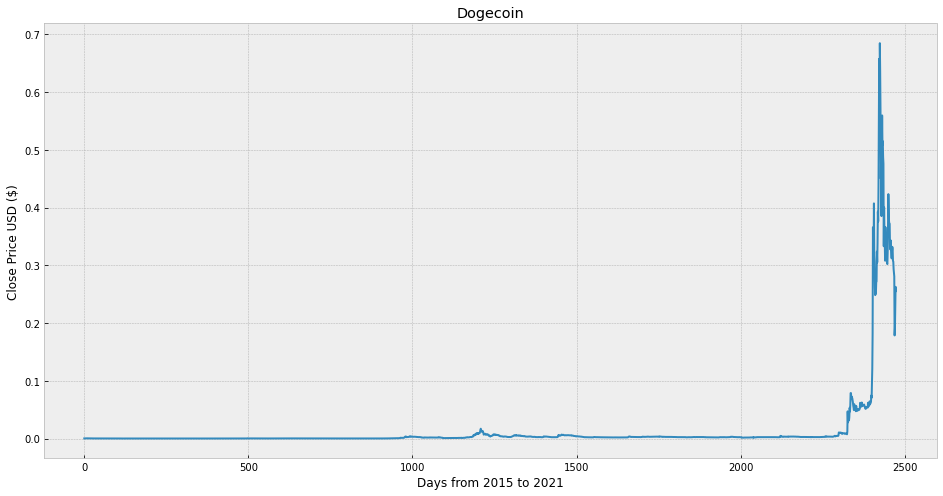

In [13]:
#Visualize the close price data
plt.figure(figsize=(16,8))
plt.title('Dogecoin')
plt.xlabel('Days from 2015 to 2021')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.show

In [14]:
#Get the close price
df = df[['Close']]
df.head(4)

,Close
0,0.000268
1,0.000298
2,0.000277
3,0.000292


In [15]:
#Create a variable to predict 'x' days out into the future
future_days = 25
#Create a new column (target) shifted 'x' days up
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(4)

,Close,Prediction
2470,0.191031,NaN
2471,0.232174,NaN
2472,0.262782,NaN
2473,0.255402,NaN


In [16]:
#Creat feature dataset (x) and convert it to numpy array and remove the last 'x' days 
X = np.array(df.drop(['Prediction'], 1))[:-future_days]

In [17]:
#Remove NaN values from x 
X = X[np.logical_not(np.isnan(X))]
print(X)

[2.68000e-04 2.98000e-04 2.77000e-04 ... 3.03110e-01 3.02224e-01
 3.25810e-01]


In [18]:
#Create the target dataset (y) and convert it to a numpy array and get all of the target values except 'x' days
y = np.array(df['Prediction'])[:-future_days]

In [19]:
#Remove NaN values from y
y = y[np.logical_not(np.isnan(y))]
print(y)

[0.00029  0.000285 0.000285 ... 0.232174 0.262782 0.255402]


In [20]:
#Split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

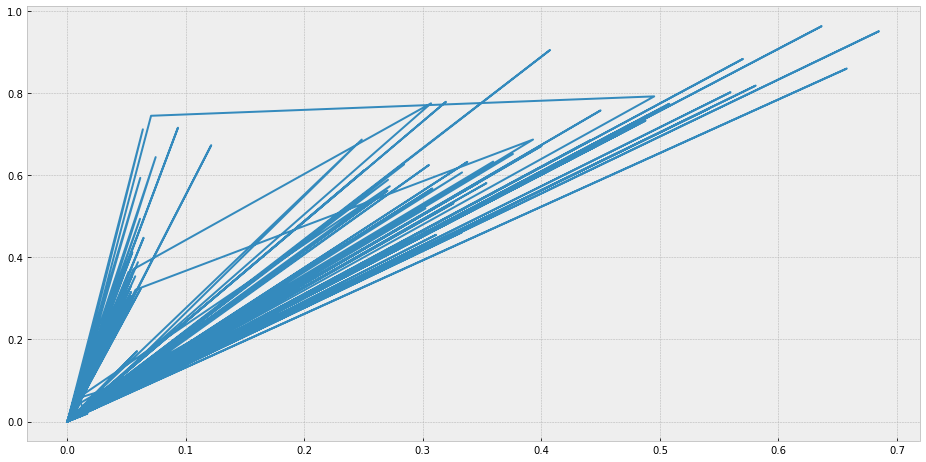

In [21]:
plt.figure(figsize=(16,8))
m, b = np.polyfit(x_train, y_train, 1)
plt.plot(x_train, m * x_train + y_train)

In [22]:
x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [23]:
#Create the models
#Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)

#Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [24]:
#Get the last 'x' days of the feature dataset
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[0.684777],
       [0.636439],
       [0.57007 ],
       [0.449964],
       [0.495231],
       [0.385376],
       [0.490374],
       [0.559604],
       [0.507972],
       [0.514895],
       [0.487892],
       [0.476115],
       [0.333123],
       [0.400194],
       [0.359382],
       [0.342371],
       [0.308071],
       [0.366162],
       [0.346302],
       [0.353693],
       [0.332945],
       [0.311205],
       [0.30311 ],
       [0.302224],
       [0.32581 ]])

In [25]:
#Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

#Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[0.370077 0.423374 0.399963 0.376323 0.372177 0.353693 0.33105  0.327687
 0.343331 0.343331 0.319359 0.312084 0.324382 0.332085 0.328381 0.307761
 0.306496 0.328381 0.287356 0.2809   0.178691 0.191031 0.262782 0.262782
 0.255402]

[[0.58579456]
 [0.54481412]
 [0.48854719]
 [0.38672261]
 [0.42509949]
 [0.33196559]
 [0.42098177]
 [0.47967423]
 [0.43590117]
 [0.44177042]
 [0.41887756]
 [0.40889315]
 [0.28766606]
 [0.34452813]
 [0.30992816]
 [0.29550641]
 [0.26642724]
 [0.31567617]
 [0.29883907]
 [0.30510508]
 [0.28751515]
 [0.26908421]
 [0.26222136]
 [0.26147021]
 [0.28146617]]


         Close  Prediction
2449  0.370077         NaN
2450  0.423374         NaN
2451  0.399963         NaN
2452  0.376323         NaN
2453  0.372177         NaN
2454  0.371807         NaN
2455  0.331050         NaN
2456  0.327687         NaN
2457  0.343331         NaN
2458  0.326351         NaN
2459  0.319359         NaN
2460  0.312084         NaN
2461  0.324382         NaN
2462  0.332085         NaN
2463  0.328381         NaN
2464  0.307761         NaN
2465  0.306496         NaN
2466  0.293472         NaN
2467  0.287356         NaN
2468  0.280900         NaN
2469  0.178691         NaN
2470  0.191031         NaN
2471  0.232174         NaN
2472  0.262782         NaN
2473  0.255402         NaN


<ipython-input-26-3345fb8b0b06>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_valid['Prediction'] = predictions


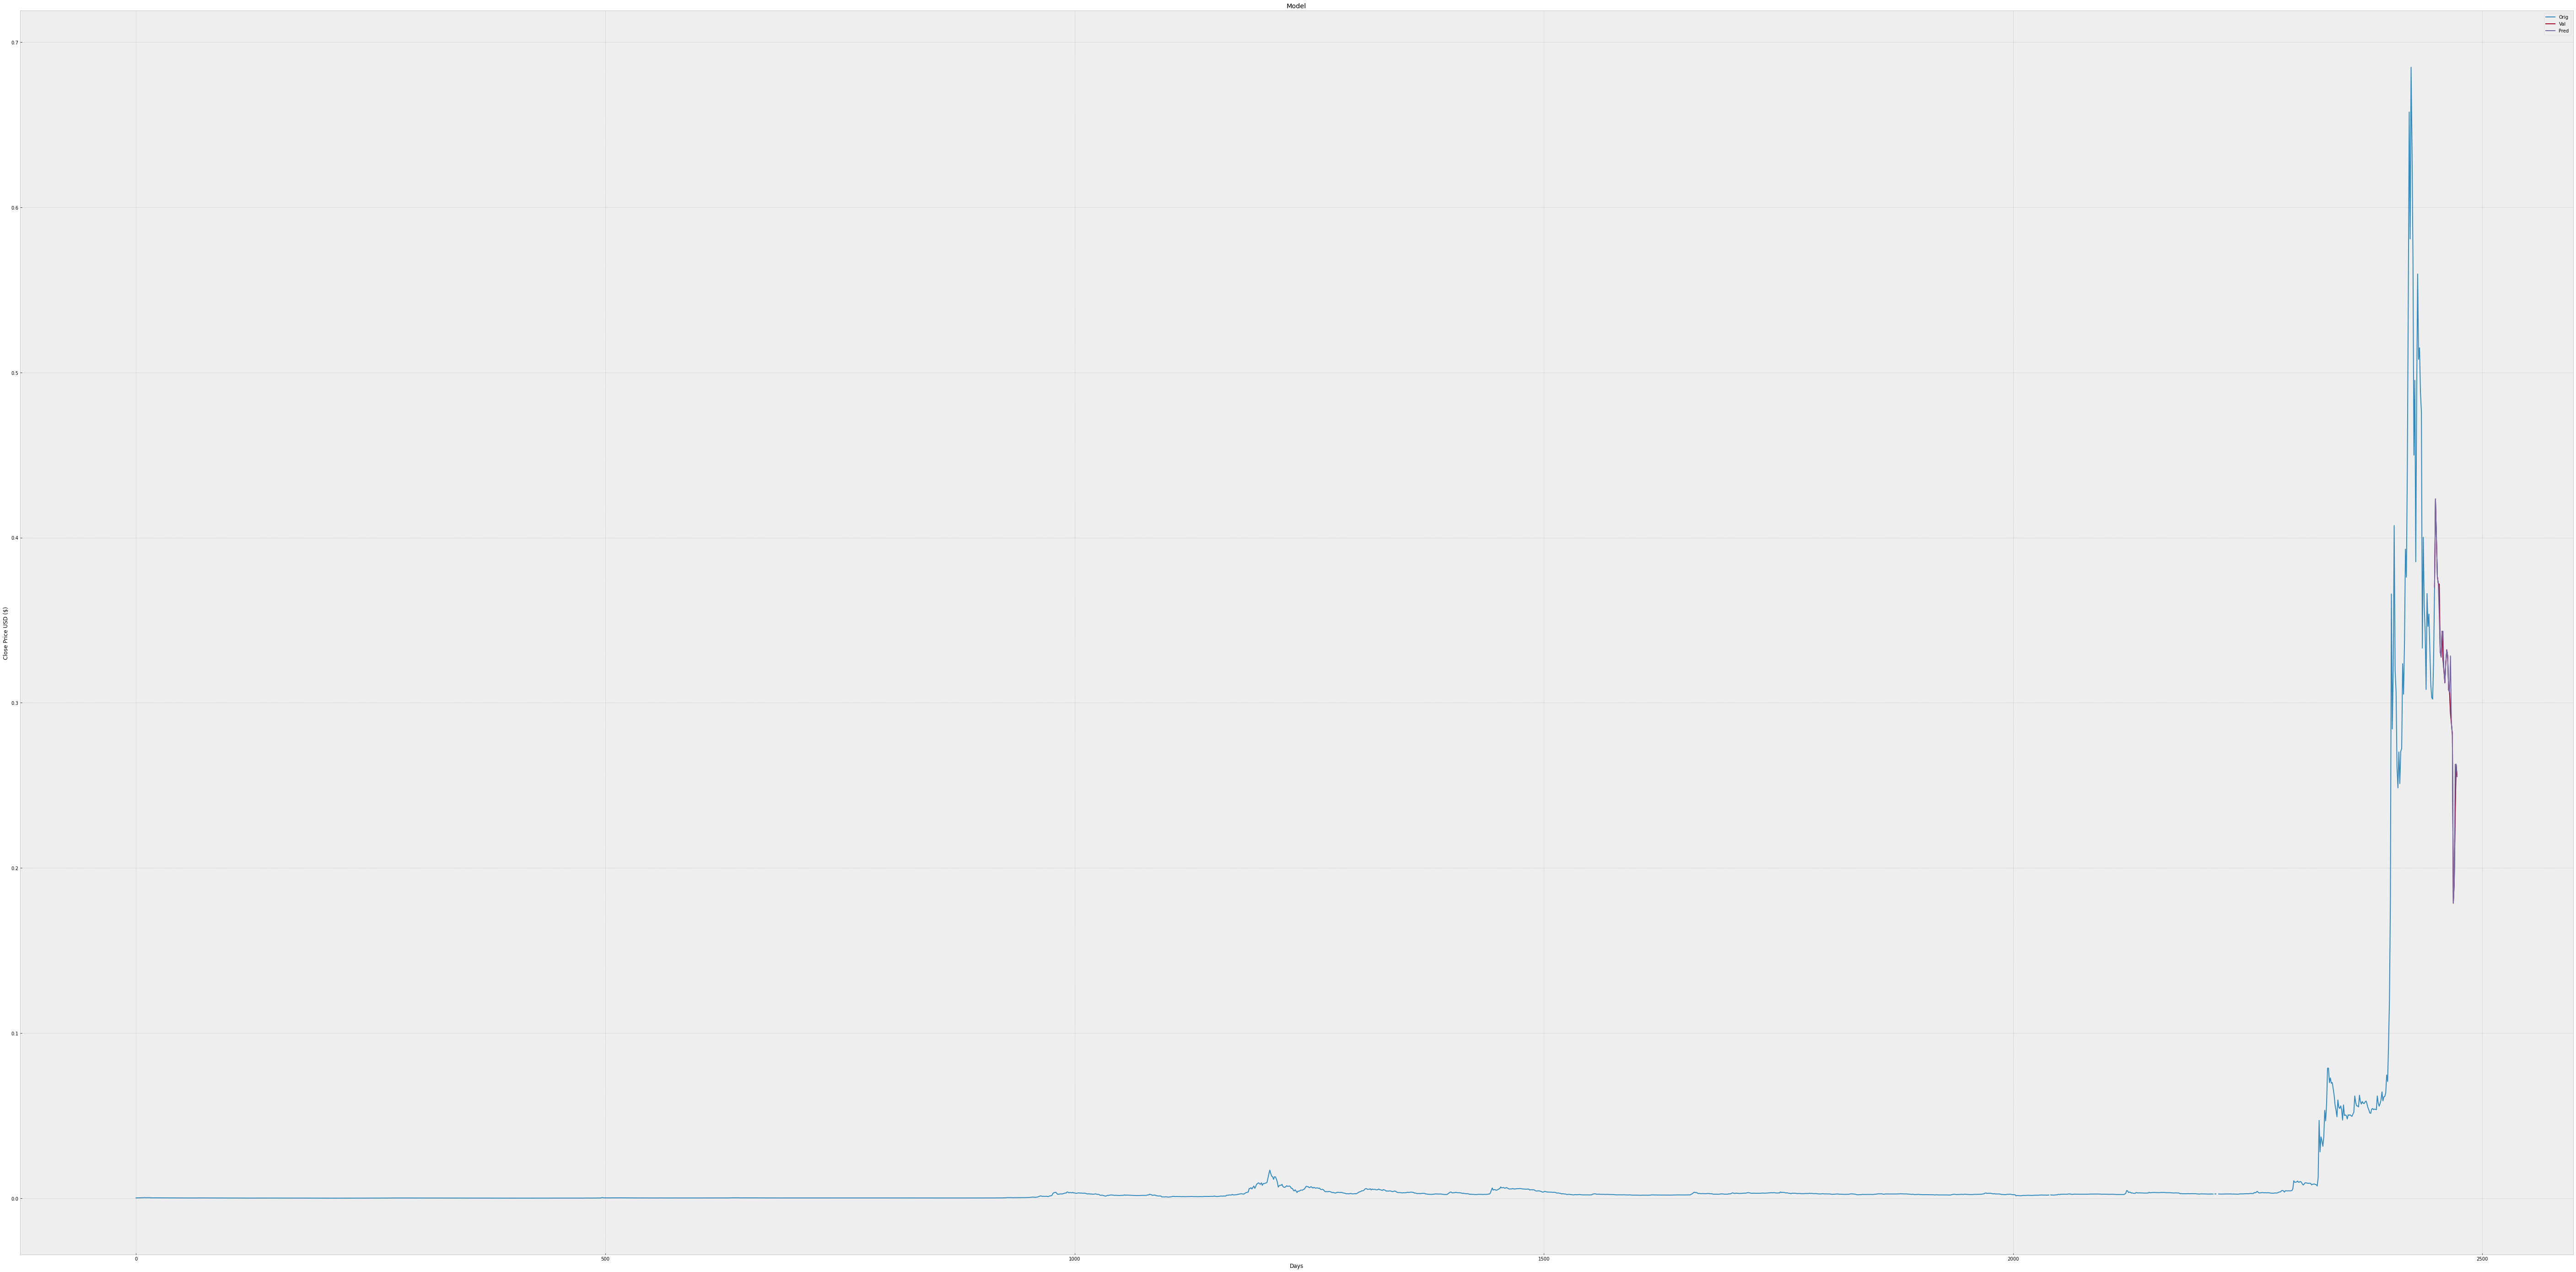

In [26]:
#Visualize data
predictions = tree_prediction

valid = df[X.shape[0]:]
last_valid = valid.tail(25)
print(last_valid)
last_valid['Prediction'] = predictions
plt.figure(figsize=(100,50))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(last_valid[['Close', 'Prediction']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()